# Loan Application Status Prediction

In [ ]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 1. Gathering Data

In [ ]:
df = pd.read_csv("loan_prediction.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Handling missing values Creation of Dummy variables Replacing the data-values

In [ ]:
df.info() #There are 3 different datatypes in the dataset which include float64(4), int64(1), object(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()  #print out sum of null values in each column


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

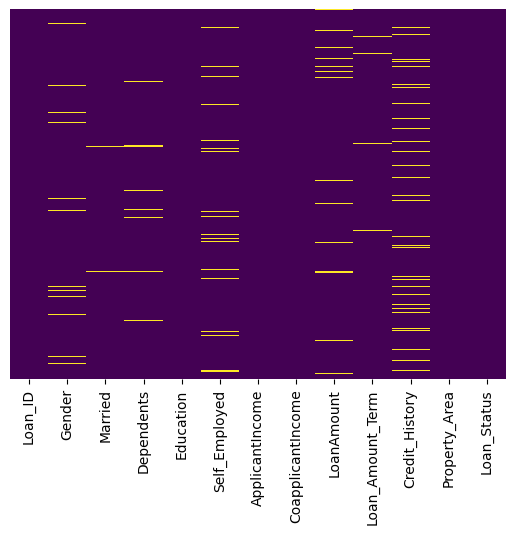

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #i used the seaborn heatmap to visualize null values in each column

from the visualization above we have missing values in gender,dependents,self-employed,loanAmount,
loan-amount-term,credit-history


In [ ]:
 df = df.fillna(df.mean().iloc[0]) #i used the fillna function to fill the missing values


<ipython-input-6-77cc5ef199e7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean().iloc[0]) #i used the fillna function to fill the missing values


In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

In [ ]:
df['Gender'].value_counts()

Male                 489
Female               112
5403.459283387622     13
Name: Gender, dtype: int64

In [ ]:
df['Married'].value_counts()

Yes                  398
No                   213
5403.459283387622      3
Name: Married, dtype: int64

In [ ]:
df['Dependents'].value_counts()

0                    345
1                    102
2                    101
3+                    51
5403.459283387622     15
Name: Dependents, dtype: int64

In [ ]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
df['Self_Employed'].value_counts()

No                   500
Yes                   82
5403.459283387622     32
Name: Self_Employed, dtype: int64

In [ ]:
df['Credit_History'].value_counts()

1.000000       475
0.000000        89
5403.459283     50
Name: Credit_History, dtype: int64

checking the relationship bw label and features

In [ ]:
sns.countplot(df['Gender'], palette='coolwarm', hue = 'Loan_Status',data=df);

TypeError: ignored

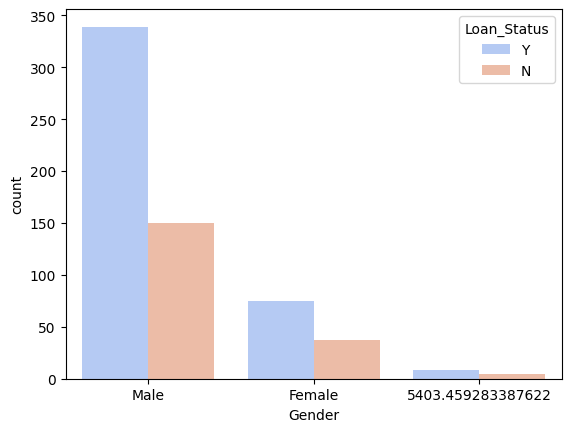

In [ ]:

sns.countplot(x='Gender', hue='Loan_Status', palette='coolwarm', data=df)
plt.show()

Text(0.5, 1.0, 'Married')

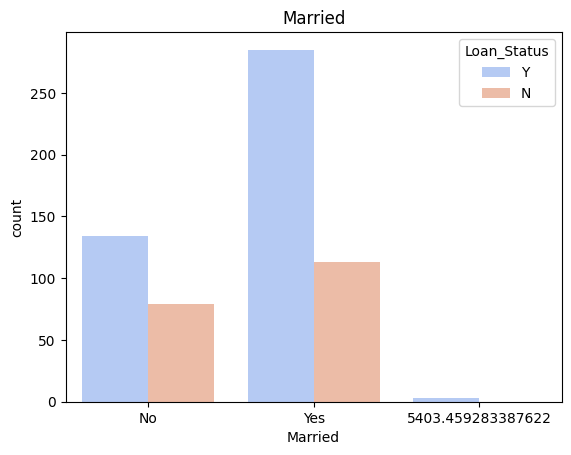

In [ ]:
# Countplot for 'Married'

sns.countplot(x='Married', hue='Loan_Status', palette='coolwarm', data=df)
plt.title('Married')

Text(0.5, 1.0, 'Dependents')

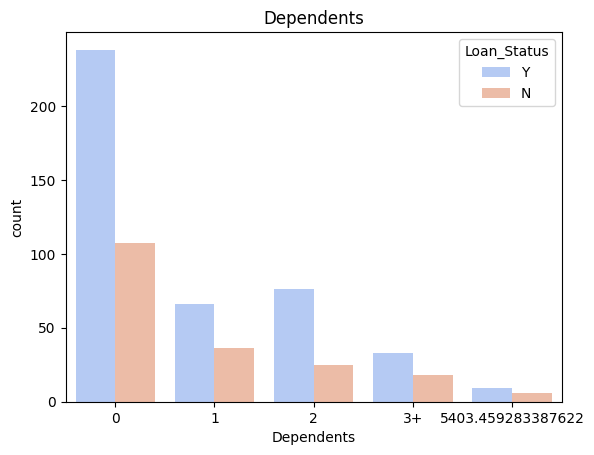

In [ ]:
# Countplot for 'Dependents'

sns.countplot(x='Dependents', hue='Loan_Status', palette='coolwarm', data=df)
plt.title('Dependents')

Text(0.5, 1.0, 'Education')

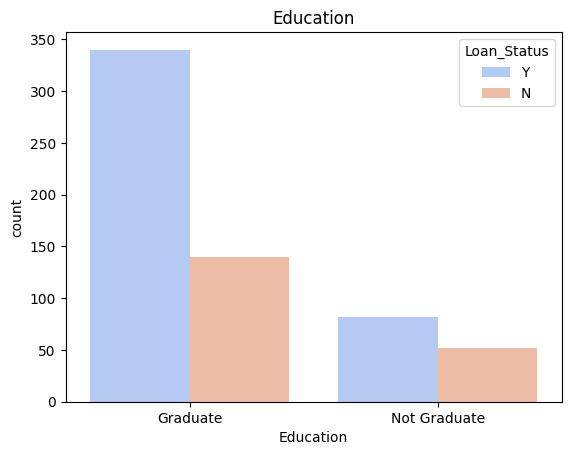

In [ ]:
# Countplot for 'Education'

sns.countplot(x='Education', hue='Loan_Status', palette='coolwarm', data=df)
plt.title('Education')

Text(0.5, 1.0, 'Self Employed')

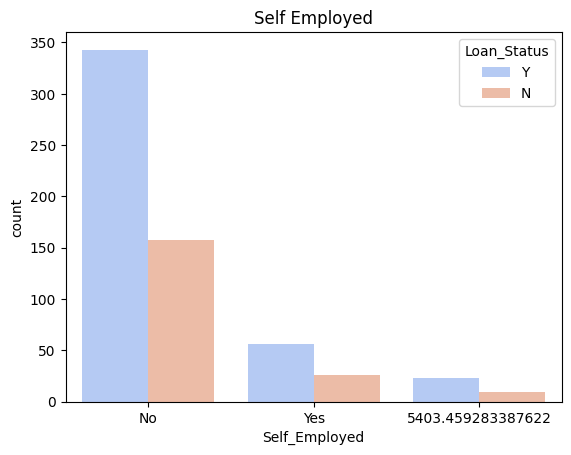

In [ ]:
# Countplot for 'Self_Employed'

sns.countplot(x='Self_Employed', hue='Loan_Status', palette='coolwarm', data=df)
plt.title('Self Employed')

Text(0.5, 1.0, 'Credit History')

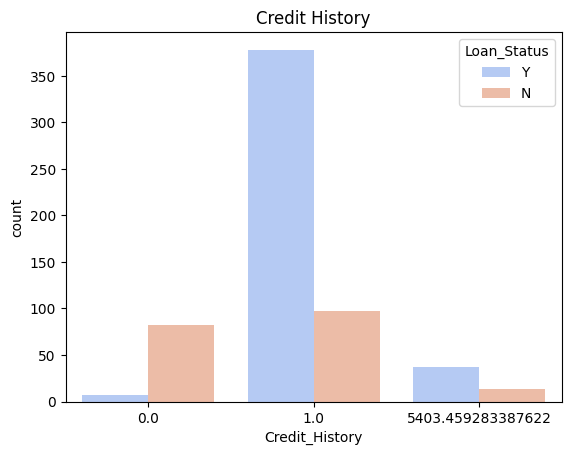

In [ ]:
# Countplot for 'Credit_History'

sns.countplot(x='Credit_History', hue='Loan_Status', palette='coolwarm', data=df)
plt.title('Credit History')

Text(0.5, 1.0, 'Property Area')

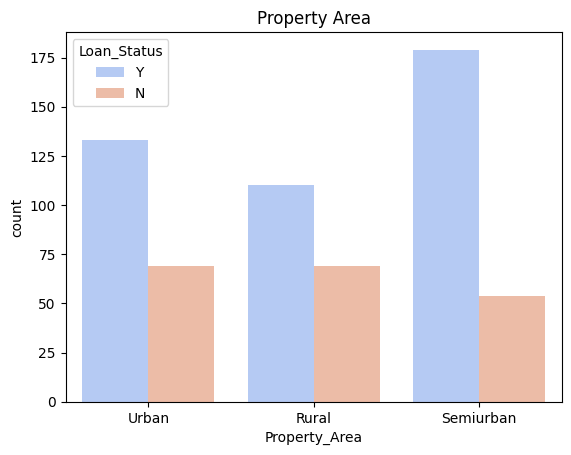

In [ ]:
# Countplot for 'Property_Area'

sns.countplot(x='Property_Area', hue='Loan_Status', palette='coolwarm', data=df)
plt.title('Property Area')

From the chart above results we can infer that, the higher percentage of loan approval is for customers with good
credit history followed bycustomers with medium credit history and then the bad

Correlation Diagram

<ipython-input-16-c1c7ed500a20>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm');


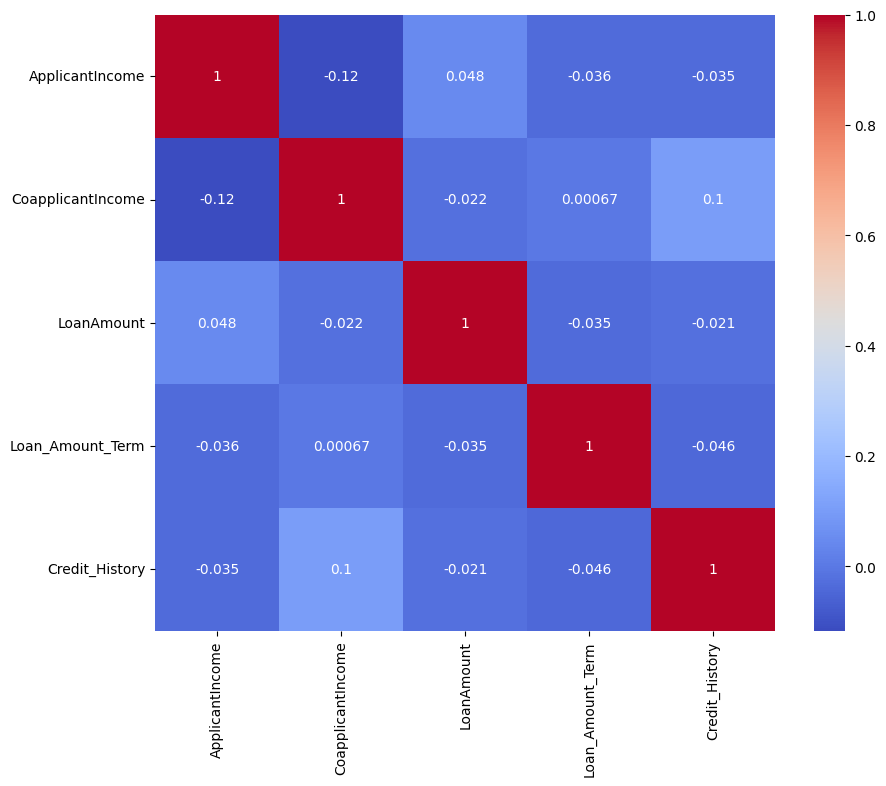

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');


no correlation

DROP UNNECESSARY COLUMNS

In [ ]:
df = df.drop(['Loan_ID','Dependents',], axis = 1)


In [ ]:
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)


In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,1,0.0,5849,0.0,5403.459283,360.0,1.0,2,1
1,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


# Training the MODEL and Making Predictions

In [ ]:
y = df['Loan_Status'] #target
x = df.drop('Loan_Status', axis = 1) #prediators

In [ ]:
#Standardize the data - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_scaled = pd.DataFrame(sc_x.fit_transform(x), columns=x.columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# logistic reggression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
# check model accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7235772357723578

In [ ]:
# confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 2, 31],
       [ 3, 87]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.06      0.11        33
           1       0.74      0.97      0.84        90

    accuracy                           0.72       123
   macro avg       0.57      0.51      0.47       123
weighted avg       0.65      0.72      0.64       123



# decision tree classifier

In [ ]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [ ]:
# check model accuracy
accuracy = accuracy_score(y_test,pred)
accuracy

0.6585365853658537

In [ ]:
# confusion matrix
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[19, 14],
       [28, 62]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.40      0.58      0.48        33
           1       0.82      0.69      0.75        90

    accuracy                           0.66       123
   macro avg       0.61      0.63      0.61       123
weighted avg       0.71      0.66      0.67       123



# knn classifier

In [ ]:
##Initiate KNeighbors Classifier
knn=KNeighborsClassifier()
#model training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
predt=knn.predict(x_test)

In [ ]:
# check model accuracy
accuracy = accuracy_score(y_test,predt)
accuracy

0.6422764227642277

In [ ]:
# confusion matrix
conf_mat=confusion_matrix(y_test,predt)
conf_mat

array([[ 6, 27],
       [17, 73]])

In [ ]:
print(classification_report(y_test,predt))

              precision    recall  f1-score   support

           0       0.26      0.18      0.21        33
           1       0.73      0.81      0.77        90

    accuracy                           0.64       123
   macro avg       0.50      0.50      0.49       123
weighted avg       0.60      0.64      0.62       123



# Random Forest Classifier

In [ ]:
 rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
predtr=rfc.predict(x_test)

In [ ]:
# check model accuracy
accuracy = accuracy_score(y_test,predtr)
accuracy

0.7967479674796748

In [ ]:
# confusion matrix
conf_mat=confusion_matrix(y_test,predt)
conf_mat

array([[ 6, 27],
       [17, 73]])

In [ ]:
print(classification_report(y_test,predt))

              precision    recall  f1-score   support

           0       0.26      0.18      0.21        33
           1       0.73      0.81      0.77        90

    accuracy                           0.64       123
   macro avg       0.50      0.50      0.49       123
weighted avg       0.60      0.64      0.62       123





*   **The Random Forest Classifier appears to have the highest accuracy among the models, at 79.67%.**
*   **Precision and recall for class 1 are important metrics. The Logistic Regression model shows a good balance between precision and recall for class 1, with 74% precision and 97% recall.**

*   **The Decision Tree Classifier and KNN Classifier have lower accuracy and precision-recall metrics compared to Logistic Regression and Random Forest.**
*   **The choice between Logistic Regression and Random Forest may depend on the specific requirements of your task. Logistic Regression may be preferred for its balanced performance, while Random Forest may be chosen for higher accuracy.**

### **so we choose high accuracy that is Random Forest Classifier**

In [ ]:
# save the model
# now save the model
pickle.dump(rfc,open('cl_loanprediction','wb'))# cl_loanprediction model is the new name of file and wb is for write